<a href="https://colab.research.google.com/github/veimahardhika/Notebook/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1VQrLtQQcHjcaqqvyP1bGw1OT_M4qUwkO?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [ ]:
print(f'           n!\nP(n,r) = ─────\n         (n-r)!')

           n!
P(n,r) = ─────
         (n-r)!


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

In [ ]:
df = pd.read_csv('/content/out20231125044331_st2014032000_ed2014032823_clat-6,7168_clon106,1840231.csv')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')

x = df['date']
y = df['value']
ycum = df['value'].cumsum()

sns.set(style="white")

plt.figure(figsize=(16, 9))
fig, ax1 = plt.subplots()
plt.margins(x=0)
plt.margins(y=0.0)

sns.lineplot(data=df, x='date', y='value', label='Curah Hujan (mm)', color='orange')
plt.xticks(rotation=45, ha='right')
plt.grid()

ax2 = ax1.twinx()
sns.lineplot(data=df, x='date', y=ycum, label='Curah Hujan Kumulatif (mm)', color='blue', linestyle='--')
ax2.margins(y=0.0)
ax2.autoscale()

ax1.set(xlabel='Waktu (Jam)', ylabel='Curah Hujan ')
ax2.set_ylabel('Curah Hujan Kumulatif (mm)')
ax1.legend(loc='upper left', fontsize='small', bbox_to_anchor=(0.0, -0.3))
ax2.legend(loc='upper left', fontsize='small', bbox_to_anchor=(0.0, -0.375))

plt.title('Sta. Met. Kelas I Bogor 20 - 28 Maret 2014')
plt.suptitle('Curah Hujan', fontweight='bold')
plt.show()

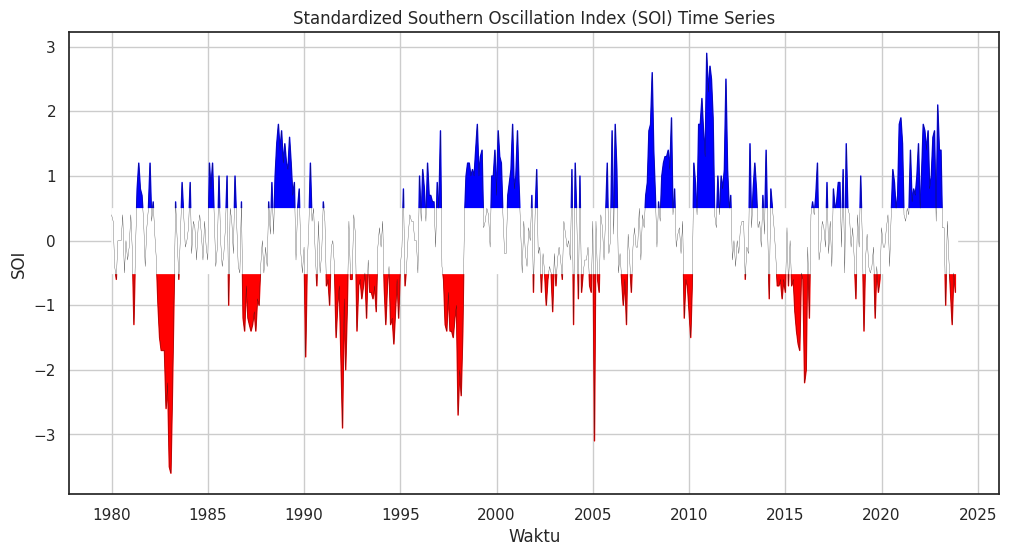

In [ ]:
excel_file = 'https://github.com/veimahardhika/Oceano/raw/0d54dba510a7479e58999cea5cb4a94ad30d73eb/soi.xlsx'
df = pd.read_excel(excel_file, engine='openpyxl', sheet_name='sois')

df_melted = pd.melt(df, id_vars=['YEAR'], var_name='Month', value_name='SOI')

df_melted['Date'] = pd.to_datetime(df_melted['YEAR'].astype(str) + '-' + df_melted['Month'], format='%Y-%b')
df_melted.sort_values(by='Date', inplace=True)
df_melted = df_melted[df_melted['Date'].dt.year >= 1980]

sns.set(style="white")
plt.figure(figsize=(12, 6))

plt.fill_between(df_melted['Date'], df_melted['SOI'], where=(df_melted['SOI'] < -0.5), color='red', interpolate=True)
plt.fill_between(df_melted['Date'], df_melted['SOI'], where=(df_melted['SOI'] > 0.5), color='blue', interpolate=True)
plt.fill_between(df_melted['Date'], -0.5, 0.5, color='white')

#plt.axhline(y=-0.5, color='gray', linestyle='--', linewidth=1)
#plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
#plt.axhline(y=-1.5, color='gray', linestyle='--', linewidth=1)
#plt.axhline(y=1.5, color='gray', linestyle='--', linewidth=1)
plt.plot(df_melted['Date'], df_melted['SOI'], linestyle='-', linewidth=0.2, color='k', alpha=1)

plt.title('Standardized Southern Oscillation Index (SOI) Time Series')
plt.xlabel('Waktu')
plt.ylabel('SOI')
plt.grid(True)
plt.show()

In [ ]:
indices_df = pd.read_csv('indices.csv')
oni_df = pd.read_csv('oni_long.csv')

oni_3mmean_column = oni_df['ONI-3MMEAN']
indices_df['ONI-3MMEAN'] = oni_3mmean_column
indices_df.to_csv('indices.csv', index=False)

In [ ]:
csv = pd.read_csv('/content/indices.csv')
csv

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3,ONI-3MMEAN
0,1982,1,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08,-1.5
1,1982,2,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20,-1.3
2,1982,3,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14,-1.2
3,1982,4,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02,-1.2
4,1982,5,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49,-1.1
...,...,...,...,...,...,...,...,...,...,...,...
498,2023,7,25.05,3.21,27.47,1.59,29.50,0.71,28.37,1.07,0.7
499,2023,8,24.16,3.30,27.17,1.96,29.65,0.95,28.20,1.30,0.6
500,2023,9,23.40,2.82,27.08,2.07,29.77,1.10,28.29,1.53,0.6
501,2023,10,23.34,2.46,27.09,2.00,29.93,1.24,28.36,1.59,0.8


In [ ]:
df = pd.read_csv('indices.csv')
df['date'] = pd.to_datetime(df['YR'].astype(str) + df['MON'].astype(str).str.zfill(2), format='%Y%m')
df = df.drop(columns=['YR', 'MON'])
df.to_csv('indices.csv')

In [ ]:
df

,Unnamed: 0,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3,ONI-3MMEAN,date
0,0,1982,1,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08,-1.5,1982-01-01
1,1,1982,2,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20,-1.3,1982-02-01
2,2,1982,3,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14,-1.2,1982-03-01
3,3,1982,4,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02,-1.2,1982-04-01
4,4,1982,5,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49,-1.1,1982-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,2023,7,25.05,3.21,27.47,1.59,29.50,0.71,28.37,1.07,0.7,2023-07-01
499,499,2023,8,24.16,3.30,27.17,1.96,29.65,0.95,28.20,1.30,0.6,2023-08-01
500,500,2023,9,23.40,2.82,27.08,2.07,29.77,1.10,28.29,1.53,0.6,2023-09-01
501,501,2023,10,23.34,2.46,27.09,2.00,29.93,1.24,28.36,1.59,0.8,2023-10-01
